Name: Arijit Roy Chowdhury
    
Email: rc.arijit@gmail.com
    
Role: Data Scientist

# Descriptive Statistics

Descriptive statistics summarize and organize characteristics of a data set. A data set is a collection of responses or observations from a sample or entire population.

In quantitative research, after collecting data, the first step of statistical analysis is to describe characteristics of the responses, such as the average of one variable (e.g., age), or the relation between two variables (e.g., age and creativity).

There are 3 main types of descriptive statistics:

1) The distribution concerns the frequency of each value.

2) The central tendency concerns the averages of the values.

3) The variability or dispersion concerns how spread out the values are.

You can apply these to assess only one variable at a time, in univariate analysis, or to compare two or more, in bivariate and multivariate analysis.

# Import Libraries

In [56]:
import time
import random
import pandas as pd
import pandas_profiling as pp
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 200) 

In [2]:
# Read the CSV File using Pandas and store it as a dataframe 'df':

df = pd.read_csv('Dataset/flight_price.csv')
df.head()

,flightId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,278519,Air_India,AI-559,Hyderabad,Early_Morning,one,Night,Mumbai,14.75,22,45883
1,264230,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Mumbai,9.33,6,58223
2,260097,Vistara,UK-852,Bangalore,Morning,one,Evening,Chennai,10.42,27,49992
3,218935,Vistara,UK-747,Delhi,Early_Morning,zero,Morning,Kolkata,2.08,47,45896
4,211085,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,23.83,41,59033


In [3]:
# Check the column names
df.columns

Index(['flightId', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'duration', 'days_left',
       'price'],
      dtype='object')

In [4]:
df.shape

# Insights: The dataset has 9045 rows and 11 columns

(9045, 11)

In [5]:
df.info()

# Insights: There are 7 object type variable columns that we will either drop or convert to numeric later
#           'price' is the Target Variable of type Integer
#           'flightId' and 'flight' are unique id's and can be dropped as they do not contribute in deciding the 'price'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9045 entries, 0 to 9044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flightId          9045 non-null   int64  
 1   airline           9045 non-null   object 
 2   flight            9045 non-null   object 
 3   source_city       9045 non-null   object 
 4   departure_time    9045 non-null   object 
 5   stops             9045 non-null   object 
 6   arrival_time      9045 non-null   object 
 7   destination_city  9045 non-null   object 
 8   duration          9045 non-null   float64
 9   days_left         9045 non-null   int64  
 10  price             9045 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 777.4+ KB


In [6]:
# Drop the columns 'flightId' and 'flight':

df.drop(['flightId', 'flight'], axis = 1, inplace = True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,Air_India,Hyderabad,Early_Morning,one,Night,Mumbai,14.75,22,45883
1,Vistara,Kolkata,Early_Morning,one,Evening,Mumbai,9.33,6,58223
2,Vistara,Bangalore,Morning,one,Evening,Chennai,10.42,27,49992
3,Vistara,Delhi,Early_Morning,zero,Morning,Kolkata,2.08,47,45896
4,Air_India,Delhi,Night,one,Night,Mumbai,23.83,41,59033


In [7]:
# Statistical Description of all Numerical Columns
df.describe()

,duration,days_left,price
count,9045.000000,9045.000000,9045.000000
mean,13.673428,25.814925,52198.478165
std,6.839508,13.514093,13179.175493
min,1.250000,1.000000,2339.000000
25%,8.750000,14.000000,44610.000000
50%,13.000000,26.000000,53164.000000
75%,17.670000,37.000000,60365.000000
max,45.830000,49.000000,117307.000000


# 1) Frequency Distribution

In [8]:
# Categories available in 'airline' and their count
df["airline"].value_counts()

# Insights: Majority of the rows are for Vistara and Air_India. So we need to drop the remaining airlines from our dataset as
# they are outliers and their numbers are not enough to train a reliable model

Vistara      5831
Air_India    3195
Indigo          6
GO_FIRST        5
SpiceJet        4
AirAsia         4
Name: airline, dtype: int64

In [9]:
# Drop rows where airline = ['Indigo', 'GO_FIRST', 'SpiceJet', 'AirAsia']:

df = df[~df["airline"].isin(['Indigo', 'GO_FIRST', 'SpiceJet', 'AirAsia'])]
df["airline"].value_counts()

Vistara      5831
Air_India    3195
Name: airline, dtype: int64

# i) Compare flight price based on number of stops and route

<AxesSubplot:xlabel='source_city,destination_city'>

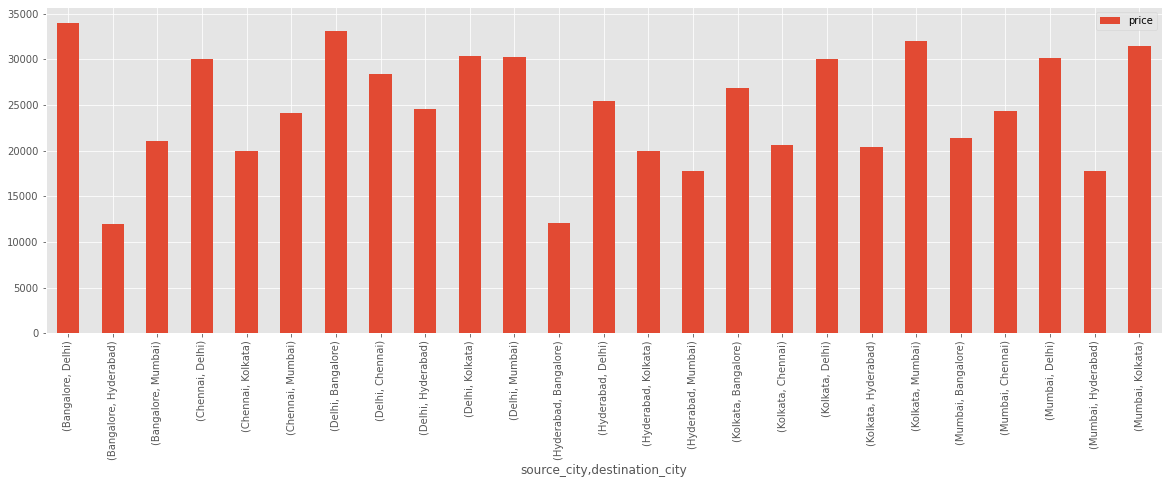

In [10]:
# Mean price between every pair of Source - Destination for Non-Stop flights

df[df['stops']=='zero'].pivot_table(['price'], ['source_city', 'destination_city']).plot(kind='bar', figsize=(20,6))

<AxesSubplot:xlabel='source_city,destination_city'>

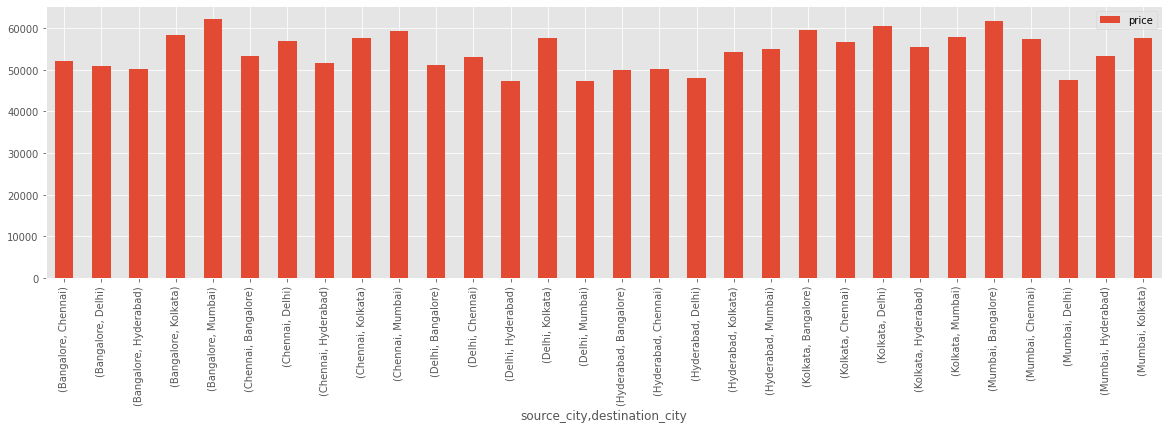

In [11]:
# Mean price between every pair of Source - Destination for One-Stop flights

df[df['stops']=='one'].pivot_table(['price'], ['source_city', 'destination_city']).plot(kind='bar', figsize=(20,5))

<AxesSubplot:xlabel='source_city,destination_city'>

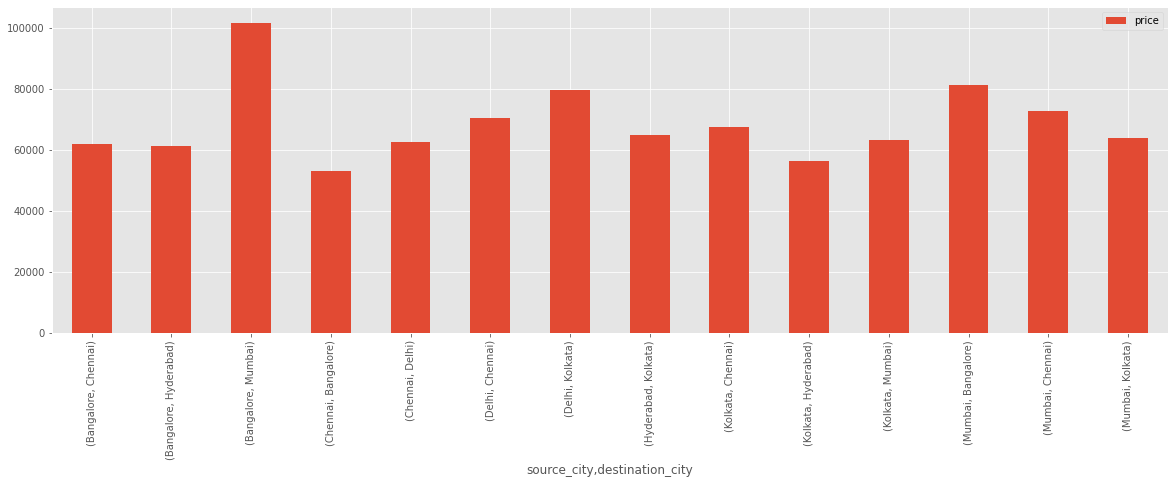

In [12]:
# Mean price between every pair of Source - Destination for Two or More Stop flights

df[df['stops']=='two_or_more'].pivot_table(['price'], ['source_city', 'destination_city']).plot(kind='bar', figsize=(20,6))

In [13]:
# Insights: Non stop flights are cheaper than One Stop and More than One Stop Flights

# ii) Compare flight duration based on number of stops and route

<AxesSubplot:xlabel='source_city,destination_city'>

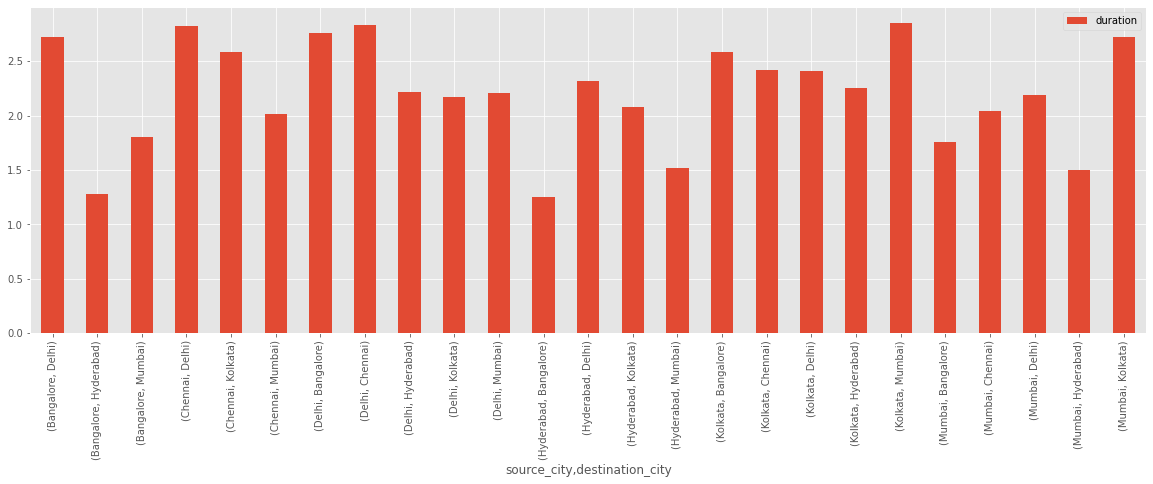

In [14]:
# Mean duration between every pair of Source - Destination for Non Stop flights

df[df['stops']=='zero'].pivot_table(['duration'], ['source_city', 'destination_city']).plot(kind='bar', figsize=(20,6))

<AxesSubplot:xlabel='source_city,destination_city'>

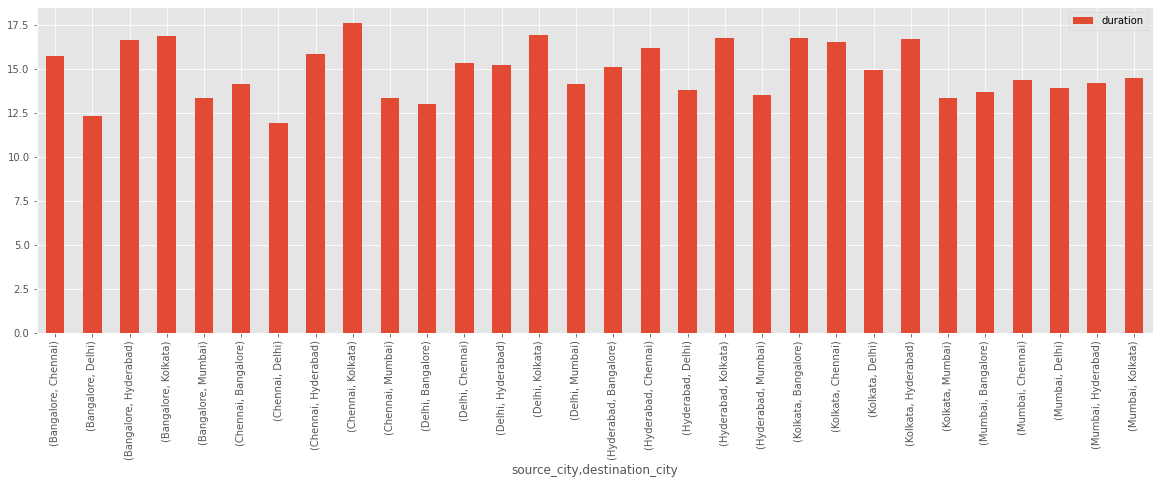

In [15]:
# Mean duration between every pair of Source - Destination for One Stop flights

df[df['stops']=='one'].pivot_table(['duration'], ['source_city', 'destination_city']).plot(kind='bar', figsize=(20,6))

<AxesSubplot:xlabel='source_city,destination_city'>

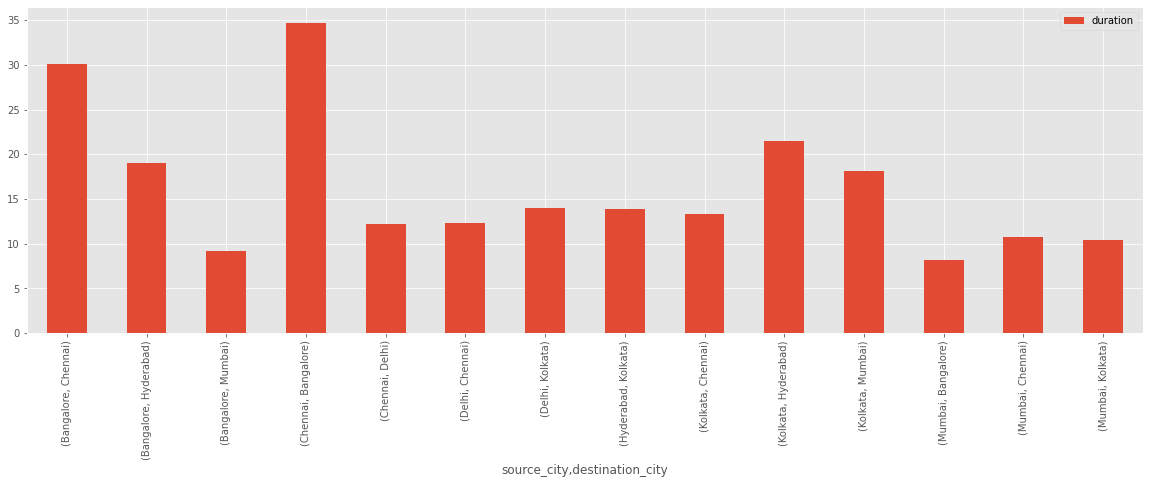

In [16]:
# Mean duration between every pair of Source - Destination for Two or More Stop flights

df[df['stops']=='two_or_more'].pivot_table(['duration'], ['source_city', 'destination_city']).plot(kind='bar', figsize=(20,6))

In [17]:
# Insights: Non stop flights are faster than One Stop and More than One Stop Flights for obvious reasons

# iii) Compare effect of days_left of price

In [18]:
# Column 'days_left' has several unique values. Hence we can bin them into range of data. 
# This will make it easier to visualize

bins = [0, 15, 30, 45, 60]
labels = ['0 - 15', '16 - 30', '31 - 45', '46 - 60']
df['days_left'] = pd.cut(df['days_left'], bins=bins, labels=labels)
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,Air_India,Hyderabad,Early_Morning,one,Night,Mumbai,14.75,16 - 30,45883
1,Vistara,Kolkata,Early_Morning,one,Evening,Mumbai,9.33,0 - 15,58223
2,Vistara,Bangalore,Morning,one,Evening,Chennai,10.42,16 - 30,49992
3,Vistara,Delhi,Early_Morning,zero,Morning,Kolkata,2.08,46 - 60,45896
4,Air_India,Delhi,Night,one,Night,Mumbai,23.83,31 - 45,59033


In [19]:
# Effect of days_left on price is inversely proportional for most of the routes

price_by_days_left = df.pivot_table(['price'], ['source_city', 'destination_city', 'days_left'])
price_by_days_left

price
source_city destination_city days_left              
Bangalore   Chennai          0 - 15     50958.559322
                             16 - 30    52758.047619
                             31 - 45    52922.196970
                             46 - 60    53469.380952
            Delhi            0 - 15     50587.016807
                             16 - 30    47799.696721
                             31 - 45    47447.520000
                             46 - 60    47497.227273
            Hyderabad        0 - 15     51643.500000
                             16 - 30    49899.683168
                             31 - 45    49761.032609
                             46 - 60    46597.705882
            Kolkata          0 - 15     59862.555556
                             16 - 30    58749.292035
                             31 - 45    57441.305556
                             46 - 60    56161.608696
            Mumbai           0 - 15     62596.702970
                             16 - 30    57596.666667
                             31 - 45    58895.893130
                             46 - 60    56134.800000
Chennai     Bangalore        0 - 15     53525.305556
                             16 - 30    53121.605263
                             31 - 45    53415.694444
                             46 - 60    52781.500000
            Delhi            0 - 15     53759.800000
                             16 - 30    49825.256098
                             31 - 45    52016.074627
                             46 - 60    54059.466667
            Hyderabad        0 - 15     51287.940000
                             16 - 30    50695.041667
                             31 - 45    52094.940299
                             46 - 60    54745.818182
            Kolkata          0 - 15     59608.507042
                             16 - 30    54814.945455
                             31 - 45    55194.847222
                             46 - 60    54419.166667
            Mumbai           0 - 15     60482.867470
                             16 - 30    55368.536082
                             31 - 45    55065.010204
                             46 - 60    59767.294118
Delhi       Bangalore        0 - 15     51256.173469
                             16 - 30    48514.846774
                             31 - 45    47771.232000
                             46 - 60    45956.571429
            Chennai          0 - 15     51997.792683
                             16 - 30    50170.588889
                             31 - 45    50586.528736
                             46 - 60    51837.185185
            Hyderabad        0 - 15     43690.028571
                             16 - 30    43332.961165
                             31 - 45    44504.736264
                             46 - 60    43031.818182
            Kolkata          0 - 15     61063.831461
                             16 - 30    53324.191489
                             31 - 45    52603.247423
                             46 - 60    58684.681818
            Mumbai           0 - 15     44927.587413
                             16 - 30    45288.322034
                             31 - 45    41963.724324
                             46 - 60    45080.777778
Hyderabad   Bangalore        0 - 15     50565.716418
                             16 - 30    50799.294118
                             31 - 45    48560.035294
                             46 - 60    48019.545455
            Chennai          0 - 15     50196.966667
                             16 - 30    49800.285714
                             31 - 45    50346.187500
                             46 - 60    51814.187500
            Delhi            0 - 15     43555.918033
                             16 - 30    44648.914286
                             31 - 45    43830.428571
                             46 - 60    44077.076923
            Kolkata          0 - 15     54165.782609
                             16 - 30    54200.440000
                   

# 2) Central Tendency

Central Tendency is defined by Mean, Median and Mode. While Mean and Median are for numerical data, Mode is for Categorical data

In [25]:
df.mean()

duration       13.681410
price       52297.540771
dtype: float64

In [26]:
df.median()

duration       13.0
price       53164.0
dtype: float64

In [27]:
df.mode()

,airline,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,Vistara,Mumbai,Morning,one,Night,Mumbai,2.17,16 - 30,54684


# Measures of variability


Measures of variability give you a sense of how spread out the response values are. The range, standard deviation and variance each reflect different aspects of spread.

In [37]:
# Standard Deviation
df.std()

duration        6.839708
price       13014.093224
dtype: float64

In [38]:
# Variance
df.var().round()

duration           47.0
price       169366622.0
dtype: float64

# Visualization

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

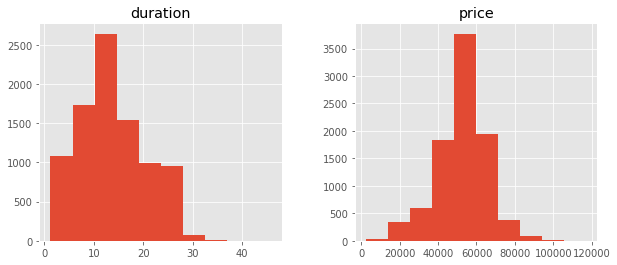

In [47]:
# Histogram for Numeric Variables
df.hist(figsize=(10,4))

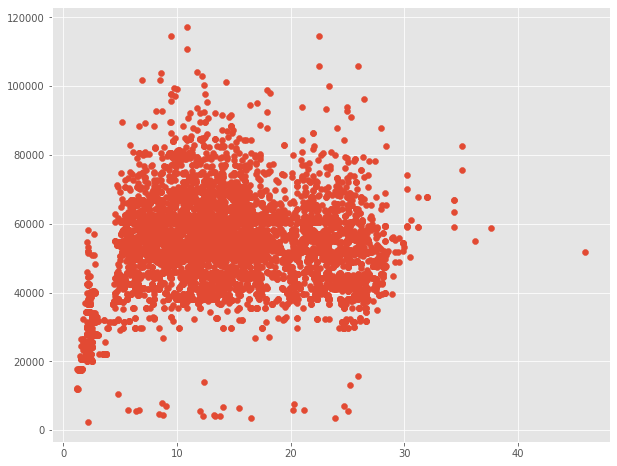

In [54]:
# Scatter Plot for Numeric Variables
fig = plt.figure(figsize = (10,8))
plt.scatter(df.duration, df.price)